## Reading in the DataFrame from the CSV file made from Featurization

In [17]:
# Read in DataFrame from CSV file
import pandas as pd
df = pd.read_csv('output.csv')
data=df
print('Loaded {} entries'.format(len(data)))
data

Loaded 559 entries


,e_fr_energy,10,11,12,13,14,15,17,18,20,...,384,385,386,387,388,389,390,397,398,400
0,-1631.095222,5.7942,1.8904,0.7112,0.7622,21.5403,7.7488,1.9962,0.3248,0.5290,...,6.0,9.0,22.0,12.0,18.0,10.0,3.0,2.0,2.857143,7.0
1,-1631.213548,5.0022,2.1846,0.6724,0.7207,20.3669,7.3266,1.8874,0.3071,0.3126,...,5.0,10.0,23.0,7.0,19.0,11.0,3.0,2.0,2.857143,4.0
2,-1631.249296,5.7232,1.8672,0.7025,0.7529,21.2765,7.6539,1.9717,0.3208,0.3919,...,3.0,12.0,22.0,5.0,23.0,7.0,4.0,2.0,2.857143,6.0
3,-1631.199946,5.6264,1.8356,0.6906,0.7401,20.9165,7.5244,2.0265,0.2365,0.4495,...,4.0,10.0,21.0,9.0,19.0,10.0,5.0,2.0,2.857143,5.0
4,-1631.144332,5.8677,1.9143,0.7202,0.7719,21.8136,7.8471,2.0215,0.3289,0.4688,...,4.0,12.0,22.0,9.0,19.0,9.0,4.0,2.0,2.857143,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,-1631.227953,6.2558,1.4604,0.7064,0.7571,21.3957,7.6967,2.0729,0.2419,0.3941,...,6.0,10.0,18.0,16.0,14.0,12.0,4.0,2.0,2.857143,6.0
555,-1631.117894,5.4046,2.3603,0.7265,0.7787,22.0055,7.9161,2.0393,0.3318,0.4053,...,6.0,13.0,22.0,7.0,22.0,8.0,5.0,2.0,2.857143,6.0
556,-1631.116032,6.1234,1.7018,0.7203,0.7720,21.8155,7.8478,2.1136,0.2467,0.4688,...,6.0,13.0,18.0,15.0,19.0,7.0,5.0,2.0,2.857143,4.0
557,-1631.116753,5.8617,1.9124,0.7195,0.7711,21.7911,7.8390,2.0194,0.3286,0.4014,...,8.0,13.0,21.0,10.0,17.0,8.0,6.0,2.0,2.857143,6.0


## Importing Libraries and and making seeds for random numbers

In [6]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random
import pandas as pd
import pickle

from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split

random.seed(1)
torch.manual_seed(1)
np.random.seed(1)

## assign features and targets (Temp) to numpy array

In [7]:
#features = data.drop('e_fr_energy', axis=1)
features = data.drop('e_fr_energy', axis=1)
features = np.array(features)
Temp = data['e_fr_energy'].values
print(Temp.shape)
print(features.shape)

(559,)
(559, 232)


## Data Loader and Splitting data set

In [8]:
Train_val_X, test_X, Train_Y, test_Y = train_test_split(features, Temp, test_size=0.1)
train_X, val_X, train_Y, val_Y = train_test_split(Train_val_X, Train_Y, test_size=0.1)
print(f'train_X.shape: {train_X.shape}, train_Y.shape: {np.array(train_Y).shape}')
print(f'val_X.shape: {val_X.shape}, val_Y.shape: {np.array(val_Y).shape}')
print(f'test_X.shape: {test_X.shape}, test_Y.shape: {np.array(test_Y).shape}')

class Dataset():
  'Characterizes a dataset for PyTorch'
  def __init__(self, list_IDs, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'

        # Load data and get label
        X = self.list_IDs[index]
        y = self.labels[index]
        return X, y

def data_loader_fn(X, Y, batch_size, shuffle, drop_last):
    data_tensor = torch.tensor(X, dtype=torch.float32)    #all_img test_x, test_y
    target_tensor = torch.tensor(Y, dtype=torch.float32)   #target

    dataset = Dataset(data_tensor, target_tensor)
    data_loader = DataLoader(dataset,  batch_size = batch_size, shuffle = shuffle, drop_last=drop_last) #model_micro.eval()
    return data_loader

l0=features.shape[1]
print('number of inputs for first layer: ', l0)

train_X.shape: (452, 232), train_Y.shape: (452,)
val_X.shape: (51, 232), val_Y.shape: (51,)
test_X.shape: (56, 232), test_Y.shape: (56,)
number of inputs for first layer:  232


## Define Model


In [9]:
class MLP(nn.Module):
    def __init__(self, l1=120, l2=84, p = 0.2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(l0, l1) # define layer number of input/outputs : input l0 neurons, output hidden layer with l1 neurons
        self.fc2 = nn.Linear(l1, l2) # define layer number of input/outputs :  input l1 neurons, output with l2 neurons 
        self.fc3 = nn.Linear(l2, 1) # define layer number of input/outputs :  input l2 neurons, output with 1 neurons 
        self.dropout = nn.Dropout(p)

    def forward(self, x):
        x = self.fc1(x) # first layer (fc1) takes 100 inputs (100 x's) and outputs l1 outputs (l1 x's) 
        x = F.relu(x) # activation function transforms x values in l1 tensor
        x = self.fc2(x) # second layer (fc2) takes the outputs of fc1 and outputs l2 outputs (l2 x's) 
        x = F.relu(x) # activation function transforms x values in l2 tensor
        
        x = self.dropout(x) # has probability p 
        x = self.fc3(x)
        return x
    
criterion = nn.MSELoss()
mae = nn.L1Loss()

# cross entropy loss ?

learning_rate = 1.0e-4
model = MLP(l1=120, l2=84 , p=0.2)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)#,0.000225

# Training

In [10]:
batch_size=20
train_loader = data_loader_fn(train_X, train_Y, batch_size=batch_size, shuffle=True, drop_last=False)
val_loader = data_loader_fn(val_X, val_Y, batch_size=batch_size, shuffle=True, drop_last=False)

running_loss_list = []
val_running_loss_list = []


performance_record = {'loss':[], 'val_loss': []}


early_stop_thresh = 20
best_loss = 100000000
best_epoch = 0
epochs = 500
for epoch in range(1, epochs):
    running_loss = []
    val_running_loss = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward  + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss.append(loss.item())

   # evaluate with validation
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):

            inputs, labels = data
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_running_loss.append(val_loss.item())


    running_loss_list.append(float(f'{np.mean(running_loss) :.4f}'))
    val_running_loss_list.append(float(f'{np.mean(val_running_loss):.4f}'))

    print(f'Epoch{epoch}: loss: {np.mean(running_loss):.4f} val_loss: {np.mean(val_running_loss):.4f}')
    this_loss = np.mean(val_running_loss)

    if this_loss < best_loss:
        best_loss = this_loss
        best_epoch = epoch
        #checkpoint(model, "best_model.pth")
    elif epoch - best_epoch > early_stop_thresh:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop

performance_record['loss'] += running_loss_list

performance_record['val_loss'] += val_running_loss_list

/nas/longleaf/home/jarkeith/.conda/envs/TorchANI/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/nas/longleaf/home/jarkeith/.conda/envs/TorchANI/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/nas/longleaf/home/jarkeith/.conda/envs/TorchANI/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likel

Epoch1: loss: 2656153.6087 val_loss: 2646934.4167
Epoch2: loss: 2637262.7065 val_loss: 2626675.6667
Epoch3: loss: 2610087.9130 val_loss: 2590803.0833
Epoch4: loss: 2567098.0326 val_loss: 2535537.5000
Epoch5: loss: 2497020.4565 val_loss: 2453467.7500
Epoch6: loss: 2402526.9674 val_loss: 2343420.6667
Epoch7: loss: 2273834.2717 val_loss: 2183899.8333
Epoch8: loss: 2100888.2717 val_loss: 2010683.9583
Epoch9: loss: 1891243.3370 val_loss: 1803639.1250
Epoch10: loss: 1654122.5707 val_loss: 1551317.6250
Epoch11: loss: 1401735.4837 val_loss: 1255370.2917
Epoch12: loss: 1131354.2310 val_loss: 998986.6250
Epoch13: loss: 851887.2228 val_loss: 758787.0833
Epoch14: loss: 631879.7704 val_loss: 531777.8333
Epoch15: loss: 417549.2323 val_loss: 344232.5625
Epoch16: loss: 267001.1902 val_loss: 219375.5521
Epoch17: loss: 159078.0459 val_loss: 132659.2630
Epoch18: loss: 99587.9081 val_loss: 81827.6536
Epoch19: loss: 69027.4925 val_loss: 68310.9128
Epoch20: loss: 54979.9501 val_loss: 39110.7630
Epoch21: los

## Save Trained Model

In [11]:
PATH = f'GAP_model_initial.pth'
torch.save(model.state_dict(), PATH)

## Load Trained Model

In [12]:
# specify path
PATH = f'GAP_model_initial.pth'
model.load_state_dict(torch.load(PATH))
model.eval()

MLP(
  (fc1): Linear(in_features=232, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

## How does the Model Learn?

<Figure size 640x480 with 0 Axes>

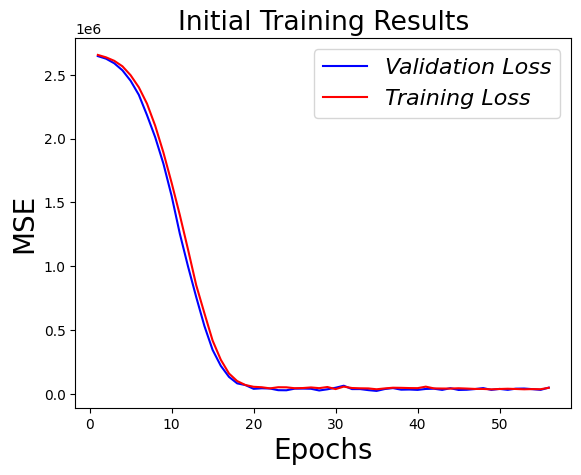

In [18]:
import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault) # this is to clear figure settings

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pylab import *


loss_values = performance_record['loss']
val_loss_values = performance_record['val_loss']

epochs = range(1, len(val_loss_values) + 1)
N = 200



fig, ax1 = plt.subplots()
rc('axes', linewidth=1.5)
plt.rcParams['font.size'] = '16'
#plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.style'] = 'italic'
plt.xlabel('Epochs', size=20)
plt.ylabel('MSE', size=20)


plt.rcParams.update({'figure.figsize': (12.0, 8.0)})

ax1.plot(range(1, len(val_loss_values) + 1), val_loss_values, 'b', label = 'Validation Loss')
ax1.plot(range(1, len(loss_values) + 1), loss_values, 'r', label = 'Training Loss')
plt.title("Initial Training Results")

plt.legend()

#plt.savefig("/noether/s0/iam5249/IM_models/IM_coverage_loss_micro_whole_10_New_patch_feature_best.png", dpi=600)
plt.show()

## Testing the model

In [14]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


test_loader = data_loader_fn(test_X, test_Y, batch_size=batch_size, shuffle=False, drop_last=False)

model.eval()
Test_Y = []
Test_Y_pred = []

for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    outputs = model(inputs)
    Test_Y += labels.tolist()
    Test_Y_pred += outputs.tolist()

test_mean_absolute_error = mae(Test_Y, Test_Y_pred)
print(test_mean_absolute_error)

72.59792218889508


## PCA Analysis
PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system 

such that the greatest variance () by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.[12]

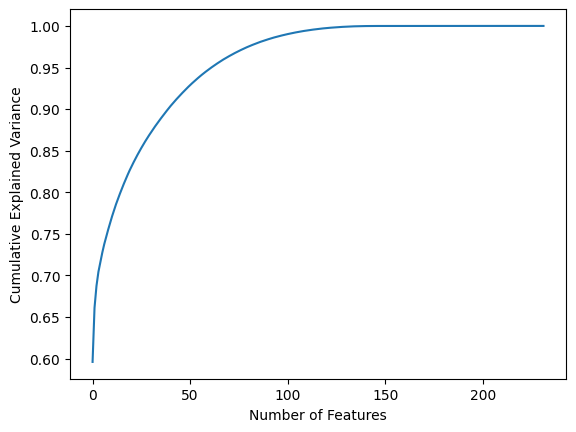

In [16]:
from sklearn.decomposition import PCA
import matplotlib as mpl 
mpl.rcParams.update(mpl.rcParamsDefault)
##%matplotlib inline
#import seaborn as sns; sns.set()
pca = PCA().fit(train_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.show()
plt.clf()